In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

### A linear regression example

We're going to look at the relationship between height in weight in 18 year old humans using [data](http://socr.ucla.edu/docs/resources/SOCR_Data/SOCR_Data_Dinov_020108_HeightsWeights.html) from UCLA's Statistics Online Computational Resource 



In [3]:
# first let's load the data
hwdata = pd.read_csv('SOCR-HeightWeight.csv')

print(hwdata.shape)

hwdata.head(20)

(25000, 2)


,height,weight
0,65.78331,112.9925
1,71.51521,136.4873
2,69.39874,153.0269
3,68.21660,142.3354
4,67.78781,144.2971
5,68.69784,123.3024
6,69.80204,141.4947
7,70.01472,136.4623
8,67.90265,112.3723
9,66.78236,120.6672


In [4]:
# by convention the independent variable is called X
# in a more complicated ML example, each entry would be a vector of features
# but in this example, it's just a number representing the height
X = hwdata['height']

# also by convention, the dependent variable is called y
y = hwdata['weight']

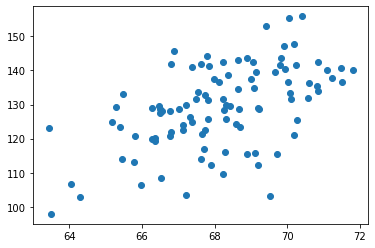

In [5]:
# to get a feel for how linear the weight vs height data is let's look at 
# the first 100 points in the data

plt.plot(X[:100],y[:100], 'o')

In [6]:
# the next two lines are the entire ML model building portion of the example

lin_reg = LinearRegression()

lin_reg.fit(np.c_[X],y)


print('intercept = ', lin_reg.intercept_ )
print('slope = ', lin_reg.coef_[0])

intercept =  -82.57574306454065
slope =  3.0834764454029626


In [7]:
def guess_your_weight(height_in_inches):
    
    predicted_weight = lin_reg.coef_[0]*height_in_inches + lin_reg.intercept_
    print(f"For the height of {height_in_inches} the predicted weight is {predicted_weight}")
    return predicted_weight

guess_your_weight(68)

For the height of 68 the predicted weight is 127.10065522286082


127.10065522286082

For the height of 60.27836 the predicted weight is 103.29116016297947
For the height of 75.1528 the predicted weight is 149.1561455415391


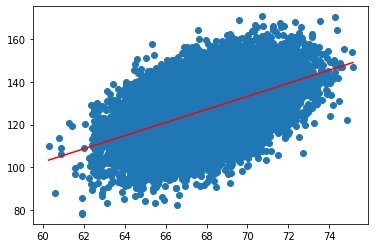

In [8]:
X_min = X.min()
X_max = X.max()
y_min = guess_your_weight(X_min)
y_max = guess_your_weight(X_max)

plt.plot(X,y, 'o')
plt.plot([X_min,X_max],[y_min,y_max],color='r')

### A classification example

Now we're going to look at a completely contrived example to see if we can use the general weather and temperature to decide if children are going to play on the local playground

In [9]:
weather = ['Sunny','Sunny','Overcast','Rainy','Rainy','Rainy','Overcast',
           'Sunny','Sunny','Rainy','Sunny','Overcast','Overcast','Rainy']

temp = ['Hot','Hot','Hot','Mild','Cool','Cool','Cool',
        'Mild','Cool','Mild','Mild','Mild','Hot','Mild']

play = ['No', 'No','Yes', 'Yes','Yes','No','Yes',
        'No','Yes','Yes','Yes','Yes','Yes','No']

In [10]:
le = LabelEncoder()

weather_encoded = le.fit_transform(weather)
temp_encoded = le.fit_transform(temp)

features = np.c_[weather_encoded, temp_encoded]

label = le.fit_transform(play)

In [11]:
print(play, label)
print(weather, weather_encoded)
print(temp, temp_encoded)

['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No'] [0 0 1 1 1 0 1 0 1 1 1 1 1 0]
['Sunny', 'Sunny', 'Overcast', 'Rainy', 'Rainy', 'Rainy', 'Overcast', 'Sunny', 'Sunny', 'Rainy', 'Sunny', 'Overcast', 'Overcast', 'Rainy'] [2 2 0 1 1 1 0 2 2 1 2 0 0 1]
['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool', 'Mild', 'Cool', 'Mild', 'Mild', 'Mild', 'Hot', 'Mild'] [1 1 1 2 0 0 0 2 0 2 2 2 1 2]


In [12]:
print(features)

[[2 1]
 [2 1]
 [0 1]
 [1 2]
 [1 0]
 [1 0]
 [0 0]
 [2 2]
 [2 0]
 [1 2]
 [2 2]
 [0 2]
 [0 1]
 [1 2]]


In [13]:
knn_clf = KNeighborsClassifier(n_neighbors=3)

knn_clf.fit(features,label)

will_play = knn_clf.predict([[0,2]]) # overcast and mild

print(will_play)

[1]
